# 🚜Predicting the sale prices of bulldozers using Machine Learning


## 1. Problme Definition

> How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold?

## 2. Data

The data is from kaggle

## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

## 4. Features

See the data dictionary given.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [3]:
# Import training and validation sets
df = pd.read_csv('data/bluebook-for-bulldozers/TrainAndValid.csv',
                low_memory=False)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [6]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

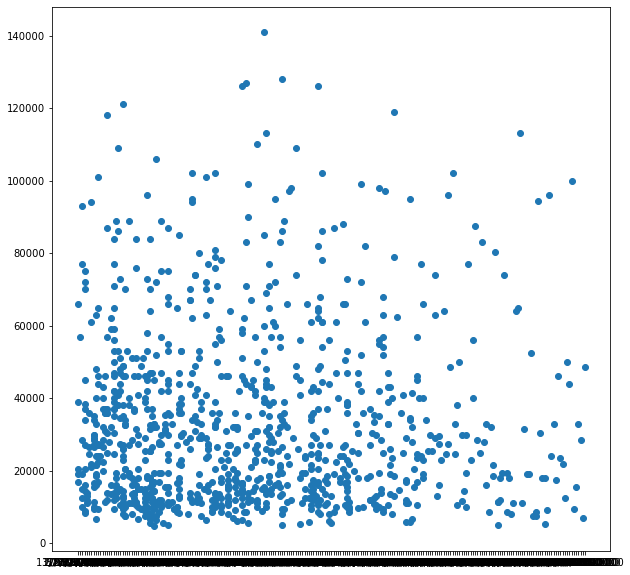

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(df.saledate[:1000], df.SalePrice[:1000])

In [10]:
df.saledate[:1000]

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

<AxesSubplot:ylabel='Frequency'>

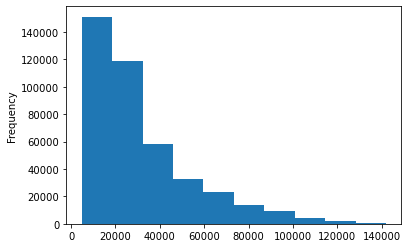

In [11]:
df.SalePrice.plot.hist()

### Parsing dates

When we work with time series data, we want to enrich the time and data component as much as possible.

We can do that by telling pandas which of our columns has dates in it using the `parse_dates` parameter.

In [12]:
# Import data again but this time parse dates
df = pd.read_csv('data/bluebook-for-bulldozers/TrainAndValid.csv',
                low_memory=False,
                parse_dates=['saledate'])

In [13]:
df.saledate.dtype

dtype('<M8[ns]')

In [14]:
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

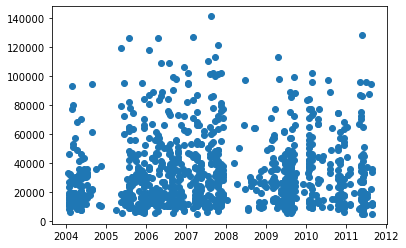

In [15]:
fig, ax = plt.subplots()
ax.scatter(df.saledate[:1000], df.SalePrice[:1000])

(array([101.,  19., 156., 131., 164.,  38.,  64., 151.,  79.,  97.]),
 array([12437. , 12714.5, 12992. , 13269.5, 13547. , 13824.5, 14102. ,
        14379.5, 14657. , 14934.5, 15212. ]),
 <BarContainer object of 10 artists>)

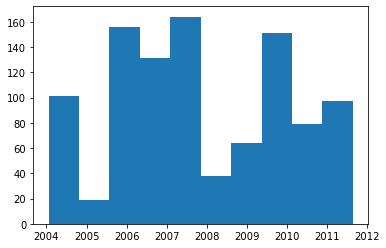

In [22]:
plt.hist(df.saledate[:1000])

In [23]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [191]:
 df.T

,205615,233186,142491,115536,92301,115892,134080,92294,31494,140922,...,407382,405913,405915,411423,412544,409901,405777,411889,411890,409203
SalesID,1646770,1728883,1508502,1452578,1403418,1453054,1491298,1403411,1263797,1504404,...,6267915,6257872,6257884,6309986,6327732,6286556,6256957,6312472,6312473,6283635
SalePrice,9500.0,30000.0,21000.0,33000.0,24000.0,36000.0,46000.0,23000.0,17000.0,26000.0,...,47000.0,13000.0,16500.0,16000.0,11000.0,23000.0,11500.0,11000.0,11000.0,34000.0
MachineID,1126363,1523610,1153157,1544443,1390168,1117184,1322436,1184544,1526902,1310407,...,1844076,1837259,1897564,1899882,1906978,1793587,1860454,1820676,1796787,1869284
ModelID,8434,9105,4138,3854,7110,3854,4107,7110,6953,4139,...,3362,3218,3263,9508,12524,4605,6868,17231,17231,4701
datasource,132,132,132,132,132,132,132,132,132,132,...,149,149,149,149,149,149,149,149,149,149
auctioneerID,18.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
YearMade,1974,1986,1972,1974,1986,1977,1987,1986,1983,1975,...,1977,1995,1996,2005,2006,2006,1000,2006,2006,1000
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,...,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00


In [28]:
df.saledate.head(50)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
20   2006-05-18
21   2006-10-19
22   2007-10-25
23   2006-10-19
24   2004-05-20
25   2006-03-09
26   2006-03-09
27   2007-02-22
28   2007-08-09
29   2006-06-01
30   2010-10-22
31   2007-03-22
32   2006-07-27
33   2010-01-28
34   2006-06-01
35   2011-06-09
36   2011-05-19
37   2004-05-20
38   2009-07-24
39   2011-06-15
40   2009-06-25
41   2010-02-25
42   2005-12-15
43   2009-07-09
44   2011-06-16
45   2006-12-14
46   2010-11-18
47   2009-08-06
48   2009-07-08
49   2006-08-24
Name: saledate, dtype: datetime64[ns]

### Sort DataFrame by saledate

When working with time series data, it's a good idea to sort it by date


In [183]:
# Sort DataFrame in date order 
df.sort_values(by = ['saledate'], inplace=True, ascending=True)
df.saledate.head(20)

205615   1989-01-17
233186   1989-01-31
142491   1989-01-31
115536   1989-01-31
92301    1989-01-31
115892   1989-01-31
134080   1989-01-31
92294    1989-01-31
31494    1989-01-31
140922   1989-01-31
66337    1989-01-31
92531    1989-01-31
82122    1989-01-31
92256    1989-01-31
145670   1989-01-31
92780    1989-01-31
238373   1989-01-31
127132   1989-01-31
115102   1989-01-31
32317    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of the original Dataframe

We make a copy of the original dataframe so when we manipulate the copy, we still got our original data,\.

In [184]:
# Make a copy
df_tmp = df.copy()

In [185]:
df_tmp.saledate

205615   1989-01-17
233186   1989-01-31
142491   1989-01-31
115536   1989-01-31
92301    1989-01-31
            ...    
409901   2012-04-28
405777   2012-04-28
411889   2012-04-28
411890   2012-04-28
409203   2012-04-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

### Add datetime paramters for saledate column

In [192]:
df_tmp['saleYear'] = df_tmp.saledate.dt.year
df_tmp['saleMonth'] = df_tmp.saledate.dt.month
df_tmp['saleDay'] = df_tmp.saledate.dt.day
df_tmp['saleDayofWeek'] = df_tmp.saledate.dt.day_of_week
df_tmp['saleDayofYear'] = df_tmp.saledate.dt.day_of_year

In [193]:
df_tmp.T

,205615,233186,142491,115536,92301,115892,134080,92294,31494,140922,...,407382,405913,405915,411423,412544,409901,405777,411889,411890,409203
SalesID,1646770,1728883,1508502,1452578,1403418,1453054,1491298,1403411,1263797,1504404,...,6267915,6257872,6257884,6309986,6327732,6286556,6256957,6312472,6312473,6283635
SalePrice,9500.0,30000.0,21000.0,33000.0,24000.0,36000.0,46000.0,23000.0,17000.0,26000.0,...,47000.0,13000.0,16500.0,16000.0,11000.0,23000.0,11500.0,11000.0,11000.0,34000.0
MachineID,1126363,1523610,1153157,1544443,1390168,1117184,1322436,1184544,1526902,1310407,...,1844076,1837259,1897564,1899882,1906978,1793587,1860454,1820676,1796787,1869284
ModelID,8434,9105,4138,3854,7110,3854,4107,7110,6953,4139,...,3362,3218,3263,9508,12524,4605,6868,17231,17231,4701
datasource,132,132,132,132,132,132,132,132,132,132,...,149,149,149,149,149,149,149,149,149,149
auctioneerID,18.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
YearMade,1974,1986,1972,1974,1986,1977,1987,1986,1983,1975,...,1977,1995,1996,2005,2006,2006,1000,2006,2006,1000
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,...,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00


In [194]:
# Now we have enriched our df with date time features, we can remove saledate
df_tmp.drop('saledate', axis=1, inplace=True)

In [195]:
# check the values for different columns
df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

## 5. Modelling
Now we will do some model driven EDA

In [42]:
np.random.seed(42)

# Let's build a machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

# model.fit(df_tmp.drop('SalePrice', axis=1), df_tmp.SalePrice)

# Before we need to convert string into numbers and fill null values

### Convert string to categories

One way we can turn our data to numbers is by converting them into pandas categories.



In [196]:
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)
        
# df_tmp.items() treats data as dictionary, label = keys, content= values

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [65]:
# df.items treats data as dictionary

random_dict = { 'key1': 'value1',
              'key2': 'value2'}

for key, value in random_dict.items():
    print(f' this is a key : {key}')
    print(f' this is a vlaue : {value}')


 this is a key : key1
 this is a vlaue : value1
 this is a key : key2
 this is a vlaue : value2


In [197]:
# this will turn all string into category values
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype('category').cat.as_ordered()

In [198]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [199]:
# pandas has changed the strings to categories i.e now each string has an associated number with it called codes

df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [200]:
df_tmp.state.cat.codes

205615    43
233186     8
142491     8
115536     8
92301      8
          ..
409901     4
405777     4
411889     4
411890     4
409203     4
Length: 412698, dtype: int8

Now we will look at missing data

In [201]:
# Check missing values
df_tmp.isna().sum()/len(df_tmp) * 100

SalesID                      0.000000
SalePrice                    0.000000
MachineID                    0.000000
ModelID                      0.000000
datasource                   0.000000
auctioneerID                 4.879113
YearMade                     0.000000
MachineHoursCurrentMeter    64.258610
UsageBand                   82.149174
fiModelDesc                  0.000000
fiBaseModel                  0.000000
fiSecondaryDesc             34.099269
fiModelSeries               85.784520
fiModelDescriptor           81.871490
ProductSize                 52.485110
fiProductClassDesc           0.000000
state                        0.000000
ProductGroup                 0.000000
ProductGroupDesc             0.000000
Drive_System                74.051970
Enclosure                    0.080931
Forks                       52.092087
Pad_Type                    80.349796
Ride_Control                62.992794
Stick                       80.349796
Transmission                54.444412
Turbocharged

### Save preprocessed data

In [341]:
# Export current tmp dataframe
df_tmp.to_csv('data/bluebook-for-bulldozers/train_tmp.csv',
             index=False)

In [342]:
# import preprocessed data
df_tmp = pd.read_csv('data/bluebook-for-bulldozers/train_tmp.csv',
                    low_memory=False)

KeyboardInterrupt: 

## Fill missing values

### Fill numeric values first

In [ ]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)  

In [ ]:
# check which numeric column has missing values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if df_tmp[label].isna().sum():
            print(label)

In [ ]:
# Fill numeric rows with the median
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if df_tmp[label].isna().sum():
            # add a binary column which tells us if the data was missing or not
            df_tmp[label + '_is_missing'] = pd.isnull(content)
            # fill missing numeric values wih median
            df_tmp[label] = content.fillna(content.median())

In [ ]:
# demonstrate how median is more robust than mean
hundreds = np.full((1000,), 100)
hundreds_billion = np.append(hundreds, 1000000000000)
np.mean(hundreds), np.mean(hundreds_billion), np.median(hundreds), np.median(hundreds_billion)

In [343]:
# check if there is any null numeric values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if df_tmp[label].isna().sum():
            print(label)

In [344]:
# check how many values we filled

df_tmp.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

### Filling and turning categorical variables into numbers

In [345]:
# check for columns which are not numeric
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        if df[label].isna().sum():
            print(label)            
            

In [346]:
# Turn categorical variables into numbers and fill missing
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # add binary column to indicate whether sample had missing value
        df_tmp[label + 'is_missing'] = pd.isnull(content)
        # turn categories into numbers and add +1
        df_tmp[label] = pd.Categorical(content).codes + 1
        
        
# We added +1 to codes because for columns with missing values, category code is -1 and we dont want that

In [347]:
pd.Categorical(df_tmp.state).codes + 1

array([44,  9,  9, ...,  5,  5,  5], dtype=int8)

In [348]:
df_tmp.isna().sum()

SalesID                        0
SalePrice                      0
MachineID                      0
ModelID                        0
datasource                     0
                              ..
Backhoe_Mountingis_missing     0
Blade_Typeis_missing           0
Travel_Controlsis_missing      0
Differential_Typeis_missing    0
Steering_Controlsis_missing    0
Length: 103, dtype: int64

In [349]:
%time
# now lets try to build ML model

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

model.fit(df_tmp.drop('SalePrice', axis=1), df_tmp.SalePrice)

CPU times: total: 0 ns
Wall time: 0 ns


KeyboardInterrupt: 

In [227]:
model.score(df_tmp.drop('SalePrice', axis=1), df_tmp.SalePrice)

0.9875966080326709

**Question:** Why is'nt the above metric reliable?

### Splitting data into train, valaidation sets

In [228]:
%autosave 2

Autosaving every 2 seconds


In [230]:
df_tmp.saleYear

0         1989
1         1989
2         1989
3         1989
4         1989
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: saleYear, Length: 412698, dtype: int64

In [231]:
df_tmp.saleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [350]:
# Split data into train and valid sets
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [351]:
# Split data into X and y
X_train, y_train = df_train.drop('SalePrice', axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop('SalePrice', axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

### Building an evaluation function

In [352]:
# Create an evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    '''
    calculate root mean squared log error between predictions and true labels
    '''
    
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = { 'Training MAE': mean_absolute_error(y_train, train_preds),
             'Valid MAE': mean_absolute_error(y_valid, val_preds),
             'Training RMSLE': rmsle(y_train, train_preds),
             'Valid RMSLE': rmsle(y_valid, val_preds),
             'Training R2': r2_score(y_train, train_preds),
             'Valid R2': r2_score(y_valid, val_preds)}
    return scores



## Testing our model on a subset ( to tune the hyperparameters)

In [238]:
# # this takes far too long for experimenting 
# %%timeit
# model = RandomForestRegressor(n_jobs=-1,
#                              random_state=42)

# model.fit(X_train, y_train)

In [353]:
# Change max_samples values
model = RandomForestRegressor(n_jobs=-1,
                             random_state=42, 
                             max_samples=10000)

In [354]:
%%timeit
# cutting down on the max number of samples each estimator can see improves training time.

model.fit(X_train, y_train)

26 s ± 936 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [355]:
show_scores(model)

{'Training MAE': 5548.995840324089,
 'Valid MAE': 7179.6961392897265,
 'Training RMSLE': 0.25737726780537257,
 'Valid RMSLE': 0.29404344200903443,
 'Training R2': 0.8610738743845616,
 'Valid R2': 0.8320179198265638}

In [356]:
%%time
### Hyperparameter tuning with RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

# Different Random Forest Regressor hyperparameters
rf_grid = {'n_estimators': np.arange(10, 100, 10),
          'max_depth': [None, 3, 5 ,10],
          'min_samples_split': np.arange(2, 20, 2),
          'min_samples_leaf': np.arange(1, 20, 2),
           'max_features': [0.5, 1, 'sqrt', 'auto'],
          'max_samples': [10000]}

# instantiate randomized search cv
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                   random_state=42),
                             param_distributions=rf_grid,
                              n_iter=2,
                              cv=5,
                              verbose=True )

# Fit 
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: total: 1min 3s
Wall time: 2min 10s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [357]:
# Find the best params
rs_model.best_params_

{'n_estimators': 50,
 'min_samples_split': 16,
 'min_samples_leaf': 9,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [358]:
# evaluate the randomised search model
show_scores(rs_model)

{'Training MAE': 6373.817915553782,
 'Valid MAE': 7715.047864719367,
 'Training RMSLE': 0.28755894283075656,
 'Valid RMSLE': 0.3120475085404911,
 'Training R2': 0.8201054356682523,
 'Valid R2': 0.8055124493647189}

### Train a model with best hyperparamters

**Note:** These were found after 100 iterations of RandomizedSearchCV

In [359]:
%%time

# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=50,
                                   min_samples_split=16,
                                   min_samples_leaf=9,
                                   max_features=0.5,
                                   n_jobs=-1,
                                   max_samples=None,
                                   random_state=42)

# Fit the ideal model
ideal_model.fit(X_train, y_train)

CPU times: total: 6min 40s
Wall time: 2min 39s


RandomForestRegressor(max_features=0.5, min_samples_leaf=9,
                      min_samples_split=16, n_estimators=50, n_jobs=-1,
                      random_state=42)

In [360]:
# score for ideal model
show_scores(ideal_model)

{'Training MAE': 3757.5233622936375,
 'Valid MAE': 6020.512485314086,
 'Training RMSLE': 0.18102941658425495,
 'Valid RMSLE': 0.24615626085343886,
 'Training R2': 0.9324478984712431,
 'Valid R2': 0.8764317733498372}

In [361]:
# score on rs_model
show_scores(rs_model)

{'Training MAE': 6373.817915553782,
 'Valid MAE': 7715.047864719367,
 'Training RMSLE': 0.28755894283075656,
 'Valid RMSLE': 0.3120475085404911,
 'Training R2': 0.8201054356682524,
 'Valid R2': 0.8055124493647189}

### Make predictions on test data



In [362]:
# import test data
df_test = pd.read_csv('data/bluebook-for-bulldozers/Test.csv',
                     low_memory=False,
                     parse_dates=['saledate'])

df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [363]:
# make predictions on test data
test_preds = ideal_model.predict(df_test)

F:\Placements\JPMC Quant\bulldozer-price-prediction-project\env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- saledate
Feature names seen at fit time, yet now missing:
- Backhoe_Mountingis_missing
- Blade_Extensionis_missing
- Blade_Typeis_missing
- Blade_Widthis_missing
- Coupler_Systemis_missing
- ...

  warnings.warn(message, FutureWarning)


ValueError: could not convert string to float: 'Low'

### Preprocessign the data ( getting the test dataset in the same format as our training dataset)

In [364]:
def preprocess_data(df):
    '''
    performs transforation on df and returns transformed data
    '''
    # 1. We added extra columns
    df['saleYear'] = df.saledate.dt.year
    df['saleMonth'] = df.saledate.dt.month
    df['saleDay'] = df.saledate.dt.day
    df['saleDayofWeek'] = df.saledate.dt.day_of_week
    df['saleDayofYear'] = df.saledate.dt.day_of_year
    
    df.drop('saledate', axis=1, inplace=True)
    
    # 2. Fill numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if df[label].isna().sum():
                # Add a binary column which tells is if data is missing
                df[label + '_is_missing'] = pd.isnull(content)
                # fill missing numeric values
                df[label] = content.fillna(content.median())
                
    # 3. Filling categorical missing data
        if not pd.api.types.is_numeric_dtype(content):
#             if df[label].isna().sum():
                # add binary column to tell is value is missing
                df[label + 'is_missing'] = pd.isnull(content)
                # filling missing values
                df[label] = pd.Categorical(content).codes + 1                
    
    return df

In [365]:
# preprocess test data
df_test = preprocess_data(df_test)


In [366]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Widthis_missing,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [367]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Widthis_missing,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,1728883,1523610,9105,132,99.0,1986,0.0,0,4772,1852,...,True,True,True,True,True,True,True,True,True,True
2,1508502,1153157,4138,132,99.0,1972,0.0,0,2347,713,...,True,True,True,True,True,False,False,False,True,True
3,1452578,1544443,3854,132,99.0,1974,0.0,0,1767,535,...,True,True,True,True,True,True,True,True,False,False
4,1403418,1390168,7110,132,99.0,1986,0.0,0,744,245,...,True,True,True,True,True,True,True,True,True,True


In [368]:
# make predixctions on updated test data
test_preds = ideal_model.predict(df_test)

F:\Placements\JPMC Quant\bulldozer-price-prediction-project\env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- auctioneerID_is_missing

  warnings.warn(message, FutureWarning)


ValueError: X has 101 features, but RandomForestRegressor is expecting 102 features as input.

In [369]:
# we can find how the columns differ using sets
set(X_train.columns) - set(df_test.columns) 

{'auctioneerID_is_missing'}

In [370]:
# manually adjust df_test to have auctioneerId_imissing
df_test['auctioneerID_is_missing'] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


Finally we can make predictions

In [371]:
# make predictions
test_preds = ideal_model.predict(df_test)

F:\Placements\JPMC Quant\bulldozer-price-prediction-project\env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [373]:
test_preds

array([21527.27355438, 21568.80143256, 49456.45554074, ...,
       13895.46121682, 18417.5004383 , 27183.67336578])

In [374]:
# Format predictions into the same format as kaggle
df_preds = pd.DataFrame()
df_preds['SalesID'] = df_test['SalesID']
df_preds['SalesPrice'] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,21527.273554
1,1227844,21568.801433
2,1227847,49456.455541
3,1227848,69414.154790
4,1227863,41816.051535
...,...,...
12452,6643171,46802.451575
12453,6643173,14177.576221
12454,6643184,13895.461217
12455,6643186,18417.500438


In [375]:
# export prediction data to csv
df_preds.to_csv('data/bluebook-for-bulldozers/test_predictions.csv', index=False)

### Feature Importance

Feature Importance seeks to figure out which different attributes of the data were most important when it comes to predicting the target variables(SalePrice).

In [377]:
# find the feature importance of our bets model
ideal_model.feature_importances_

array([3.15361246e-02, 1.57464798e-02, 4.08463609e-02, 1.83300380e-03,
       2.02794748e-03, 2.17609975e-01, 2.21655927e-03, 6.81498819e-04,
       3.99179843e-02, 4.20266588e-02, 6.36298261e-02, 4.81710694e-03,
       1.33581077e-02, 1.62168301e-01, 4.58433485e-02, 3.86029670e-03,
       2.62434387e-03, 2.05389642e-03, 3.90358773e-03, 6.27909757e-02,
       2.53159057e-04, 1.96179736e-04, 8.06888214e-04, 2.32130835e-04,
       1.45027392e-03, 1.34267748e-04, 3.35676800e-03, 1.24549321e-02,
       4.60325185e-03, 2.60837134e-05, 3.80200099e-03, 1.98817497e-03,
       2.78231111e-03, 5.36433277e-04, 2.17614728e-03, 4.56874492e-03,
       6.32383978e-04, 1.46793722e-02, 3.82092480e-03, 5.23364100e-03,
       1.01462531e-03, 5.97179046e-04, 7.42549932e-04, 3.98333318e-04,
       3.39620230e-04, 1.94500209e-04, 2.92462029e-04, 1.24849271e-03,
       1.13841616e-03, 1.80655101e-04, 1.91023981e-04, 7.29601390e-02,
       2.96891774e-03, 3.41156080e-03, 1.67425826e-03, 7.25759590e-03,
      

In [395]:
# these figures tell us how each feature is important of our model
# some is 0 and others are higher
len(ideal_model.feature_importances_), X_train.shape

(102, (401125, 102))

In [396]:
# helper function for plotting feature importacne 
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({'features': columns,
                       'feature_importances': importances})
         .sort_values('feature_importances', ascending=False)
         .reset_index(drop=True))
    
    # plot dataframe
    fig, ax = plt.subplots()
    ax.barh(df.features[:n], df.feature_importances[:20])
    ax.set_ylabel('Features')
    ax.set_xlabel('Feature importance')
    ax.invert_yaxis()

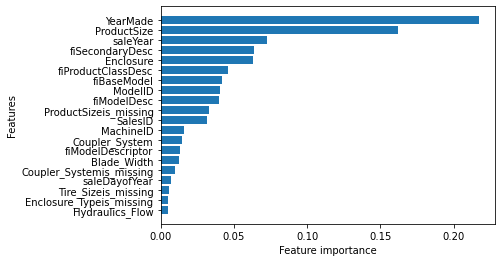

In [397]:
plot_features(X_train.columns, ideal_model.feature_importances_)

**Question:** Why misght knowign the feature importances of a trained ML model be helpful?

**Final Challenge** What other machine learnign models could be tried?